## Yatsa Data Analytics

Yatsa is company that helps you track and manage your assets better. 
This notebook is a quick look at the data that Yatsa collects from their user's assets and the trips the assets being tracked have made. The goal of the analytics is to provide insights from the data and answer the following business questions:
- What is the average distance travelled by vehicles in a day, week or month?
- What are the most common destination for vehicles and how frequent do they travel to  these destinations?

### Extra
- Any trends in driver behaviour for example speeding?
- Any pattern or trends in the types of trips made by vehicles for example: do smaller vehicles travel through smaller distances.

`trips.json` file is too large to be uploaded to github. It can be download from [here](https://drive.google.com/drive/folders/1cVddbKWqv8B9NF6B0ALS3Rv4vZAxEi1Z?usp=share_link)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
assets = pd.read_json('Data/assets.json')

In [2]:
assets.head()

,id,make,model,year
0,QRmYjfT,TOYOTA Ractis 1.0,Ractis 1.0,2006.0
1,DpXMzg3,Lexus CT 200h,CT 200h,NaN
2,4tQe9sV,Honda Odyssey,Odyssey,NaN
3,x2LJWsl,MITSUBISHI Lancer Cedia LA-CS2A,Lancer Cedia LA-CS2A,2005.0
4,eH0O4bf,Nissan,Note,2011.0


In [3]:
import json

In [4]:
with open('Data/trips.json') as f:
    trips = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/trips.json'

In [5]:
print(trips[0])

NameError: name 'trips' is not defined

In [36]:
columns = []
columns.append('id')
columns.append('created')
columns.append('asset_id')
columns.append('distance')
data_origin = trips[3]['origin']
data_destination = trips[4]['destination']
data_points = trips[6]['points'][0]
for key in data_origin.keys():
    if key not in columns:
        columns.append('origin_' + key)
for key in data_destination.keys():
    if key not in columns:
        columns.append('destination_' + key)
for k, v in data_points.items():
    if k not in columns:
        if k == 'location':
            for key in v.keys():
                if key not in columns:
                    columns.append('point_' + key)
        else:
            columns.append('point_' + k)
print(columns)


['id', 'created', 'asset_id', 'distance', 'origin_latitude', 'origin_longitude', 'origin_time_stamp', 'origin_address', 'origin_odometer', 'destination_latitude', 'destination_longitude', 'destination_time_stamp', 'destination_address', 'destination_odometer', 'point_bearing', 'point_latitude', 'point_longitude', 'point_original_index', 'point_place_id']


In [39]:
trips_df = pd.DataFrame(columns=columns)
# fill the dataframe columns with trips data 

In [43]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,-1.04322,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",None,-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",None,0.0,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",None,0.0,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,-1.30549,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,-1.397144,36.75983,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",None,-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",None,0.0,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


`Load` data into a Pandas dataframe from the CSV file in the `Data` folder. Do not run the two code cells below as it will take much time to execute.

In [42]:
for i, trip in enumerate(trips):
    trips_df.loc[i, 'id'] = trip['id']
    trips_df.loc[i, 'created'] = trip['created']
    trips_df.loc[i, 'asset_id'] = trip['asset_id']
    trips_df.loc[i, 'distance'] = trip['distance']
    for key, value in trip['origin'].items():
        trips_df.loc[i, 'origin_' + key] = value
    for key, value in trip['destination'].items():
        trips_df.loc[i, 'destination_' + key] = value
    for i, v in enumerate(trip['points']):
        for key, value in v.items():
            if key == 'location':
                for k, v in value.items():
                    trips_df.loc[i, 'point_' + k] = v
            else:
                trips_df.loc[i, 'point_' + key] = value

In [44]:
# save the trips_df to csv file
trips_df.to_csv('Data/trips_df.csv', index=False)

# Execute the code cells below to start working with trips data.

In [74]:
trips_df = pd.read_csv('Data/trips_df.csv')

In [75]:
trips_df.shape

(6703, 19)

In [76]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,origin_odometer,destination_latitude,destination_longitude,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index
count,4804.000000,4804.000000,4804.000000,0.0,4804.000000,4804.000000,0.0,6703.000000,6703.000000,6703.000000,6703.000000
mean,11241.547325,-1.033155,36.911776,NaN,-1.033224,36.911758,NaN,-15.064304,-0.404014,36.305245,6.828883
std,20407.447419,0.433675,0.411567,NaN,0.435225,0.411621,NaN,74.698946,0.846147,0.891082,20.025799
min,101.510000,-3.229457,34.215324,NaN,-3.328162,34.217648,NaN,-180.000000,-1.295174,34.998313,0.000000
25%,1634.500000,-1.248051,36.824792,NaN,-1.249770,36.824720,NaN,-53.565599,-1.040912,35.256035,0.000000
50%,4962.310000,-1.126192,36.995655,NaN,-1.126177,36.993961,NaN,0.000000,-1.036796,37.051986,0.000000
75%,11809.925000,-1.051952,37.092146,NaN,-1.051691,37.092073,NaN,0.000000,0.521471,37.072456,0.000000
max,342478.600000,1.256370,40.124302,NaN,1.256327,40.126652,NaN,180.000000,1.024317,37.094406,99.000000


In [77]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",NaN,-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",NaN,0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",NaN,-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",NaN,0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


In [78]:
trips_df.tail()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
6698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.326052,-1.289222,36.791666,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.738238,-1.289234,36.791669,41,ChIJs_apPKUQLxgRFj_nEgRciEw
6700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.738238,-1.289438,36.791713,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-144.286924,-1.289483,36.791681,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-93.347666,-1.289484,36.791662,42,ChIJs_apPKUQLxgRFj_nEgRciEw


In [79]:
trips_df.dtypes

id                         object
created                    object
asset_id                   object
distance                  float64
origin_latitude           float64
origin_longitude          float64
origin_time_stamp          object
origin_address             object
origin_odometer           float64
destination_latitude      float64
destination_longitude     float64
destination_time_stamp     object
destination_address        object
destination_odometer      float64
point_bearing             float64
point_latitude            float64
point_longitude           float64
point_original_index        int64
point_place_id             object
dtype: object

In [80]:
trips_df.columns

Index(['id', 'created', 'asset_id', 'distance', 'origin_latitude',
       'origin_longitude', 'origin_time_stamp', 'origin_address',
       'origin_odometer', 'destination_latitude', 'destination_longitude',
       'destination_time_stamp', 'destination_address', 'destination_odometer',
       'point_bearing', 'point_latitude', 'point_longitude',
       'point_original_index', 'point_place_id'],
      dtype='object')

In [81]:
trips_df.isna().sum()

id                        1899
created                   1899
asset_id                  1899
distance                  1899
origin_latitude           1899
origin_longitude          1899
origin_time_stamp         1899
origin_address            1900
origin_odometer           6703
destination_latitude      1899
destination_longitude     1899
destination_time_stamp    1899
destination_address       1900
destination_odometer      6703
point_bearing                0
point_latitude               0
point_longitude              0
point_original_index         0
point_place_id               0
dtype: int64

In [82]:
trips_df.nunique()

id                        4804
created                   4804
asset_id                    34
distance                  4800
origin_latitude           4571
origin_longitude          4168
origin_time_stamp         4803
origin_address            1136
origin_odometer              0
destination_latitude      4517
destination_longitude     3972
destination_time_stamp    4803
destination_address       1021
destination_odometer         0
point_bearing             4087
point_latitude            3636
point_longitude           3639
point_original_index       100
point_place_id            1417
dtype: int64

In [83]:
trips_df = trips_df.drop(columns=['destination_odometer','origin_odometer'], axis=1)

## Util
1. This function converts the timestamps in the dataframe to a standard format.
- The columns with timestamps include:
   - created
   - destination_timestamp
   - origin_timestamp
- Creating a copy of the original dataframe before modifying it avoids accidentally modifying the original data.   
- The function returns a new dataframe with the changed formats
   

In [84]:
def convert_time(columns:list[str]):
    trips_df_copy1 = trips_df.copy()
    for column in columns:
        trips_df_copy1[column] = pd.to_datetime(trips_df_copy1[column])
    return trips_df_copy1    

In [85]:
trips_df = convert_time(columns=['created', 'origin_time_stamp','destination_time_stamp' ])

In [86]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


### Creating a new column called duration in hours

In [87]:
trips_df['duration'] = (pd.to_datetime(trips_df['destination_time_stamp']) - pd.to_datetime(trips_df['origin_time_stamp'])).dt.seconds / 3600

In [88]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,duration
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,0.372222
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,1.332222
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.737778
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.290833
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,1.737778


In [89]:
trips_df['created_day'] = trips_df['created'].dt.strftime('%A')
trips_df['created_week'] = trips_df['created'].dt.isocalendar().week
#trips_df['created_week'] = trips_df['created'].dt.day // 7 + 1 
trips_df['created_month'] = trips_df['created'].dt.strftime('%B')


In [90]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,duration,created_day,created_week,created_month
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,0.372222,Monday,11,March
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,1.332222,Tuesday,10,March
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.737778,Tuesday,10,March
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.290833,Tuesday,10,March
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,1.737778,Tuesday,10,March


In [91]:
import math
 
 # a is the result of applying the Haversine formula on the differences in latitudes and longitudes between the two points
 # c is the angular distance between those points

def distance(org_lat, org_lon, dest_lat, dest_lon):
    R = 6371  # radius of the Earth in km

    # convert latitudes and longitudes from degrees to radians
    org_lat, org_lon, dest_lat, dest_lon = map(math.radians, [org_lat, org_lon, dest_lat, dest_lon])

    # calculate the differences in latitudes and longitudes
    dlat = dest_lat - org_lat
    dlon = dest_lon - dest_lon

    # apply the Haversine formula(calculates the distance between two points if you have their latitude and longitude values)
    a = math.sin(dlat / 2)**2 + math.cos(org_lat) * math.cos(dest_lat) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

#### The apply() function applies the distance() function to each row of trips_df, using the latitude and longitude values in the 'origin_latitude', 'origin_longitude', 'destination_latitude', and 'destination_longitude' columns as the arguments to the distance() function. The resulting distance in kilometers is stored in a new column called 'distance_km'.

In [92]:
trips_df['distance_km'] = trips_df.apply(lambda row: distance(row['origin_latitude'], row['origin_longitude'], row['destination_latitude'], row['destination_longitude']), axis=1)

In [93]:
pd.set_option('display.max_columns', None)  # show all columns
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,duration,created_day,created_week,created_month,distance_km
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,0.372222,Monday,11,March,0.223169
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,1.332222,Tuesday,10,March,13.902030
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.737778,Tuesday,10,March,13.835872
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.290833,Tuesday,10,March,13.840989
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,1.737778,Tuesday,10,March,10.179775


### Creating Average speed column (km/h)

In [94]:
trips_df['average_speed'] = trips_df['distance_km'] / trips_df['duration']

In [95]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,duration,created_day,created_week,created_month,distance_km,average_speed
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,0.372222,Monday,11,March,0.223169,0.599559
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,1.332222,Tuesday,10,March,13.902030,10.435219
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.737778,Tuesday,10,March,13.835872,7.961819
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.290833,Tuesday,10,March,13.840989,10.722522
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,1.737778,Tuesday,10,March,10.179775,5.857927


In [96]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,destination_latitude,destination_longitude,point_bearing,point_latitude,point_longitude,point_original_index,duration,created_week,distance_km,average_speed
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,6703.000000,6703.000000,6703.000000,6703.000000,4804.000000,4804.000000,4804.000000,4804.000000
mean,11241.547325,-1.033155,36.911776,-1.033224,36.911758,-15.064304,-0.404014,36.305245,6.828883,0.563447,20.725437,3.278501,11.386412
std,20407.447419,0.433675,0.411567,0.435225,0.411621,74.698946,0.846147,0.891082,20.025799,0.739480,17.147235,9.249510,350.987445
min,101.510000,-3.229457,34.215324,-3.328162,34.217648,-180.000000,-1.295174,34.998313,0.000000,0.002222,1.000000,0.000000,0.000000
25%,1634.500000,-1.248051,36.824792,-1.249770,36.824720,-53.565599,-1.040912,35.256035,0.000000,0.157500,7.000000,0.176719,0.771412
50%,4962.310000,-1.126192,36.995655,-1.126177,36.993961,0.000000,-1.036796,37.051986,0.000000,0.347500,9.000000,0.774696,3.489016
75%,11809.925000,-1.051952,37.092146,-1.051691,37.092073,0.000000,0.521471,37.072456,0.000000,0.651458,40.000000,2.957199,8.020920
max,342478.600000,1.256370,40.124302,1.256327,40.126652,180.000000,1.024317,37.094406,99.000000,8.738889,52.000000,145.272174,24305.740968


## Util 2
- A function to draw the bar graphs
- the figsize is by default (8,6)
- the feature are the columns in the trips_df
- label is the string of the feature ,e.g Day 

In [97]:
def draw_bar(feature: any, label:str, figsize = (8,6)):
    avg_distance = trips_df.groupby(feature)['distance_km'].mean()
    fig1, ax1 = plt.subplots(figsize=figsize)
    ax1.bar(avg_distance.index, avg_distance.values)
    ax1.set_xlabel(label)
    ax1.set_ylabel('Average Distance Travelled (km)')
    ax1.set_title('Average Distance Travelled by Vehicles in a {}'.format(label))
    plt.show()

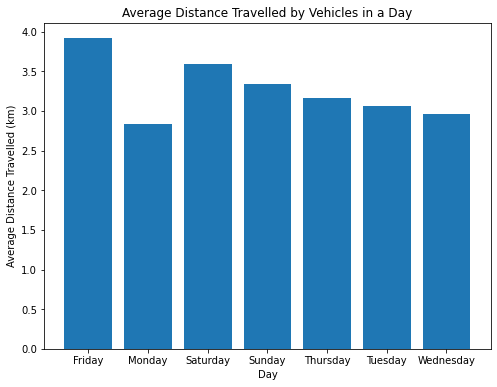

In [98]:
draw_bar(feature='created_day', label='Day')


### NOTES
- Vehicles travel farthest on Friday, Saturday and Sunday
- Vehicles travel least on Monday

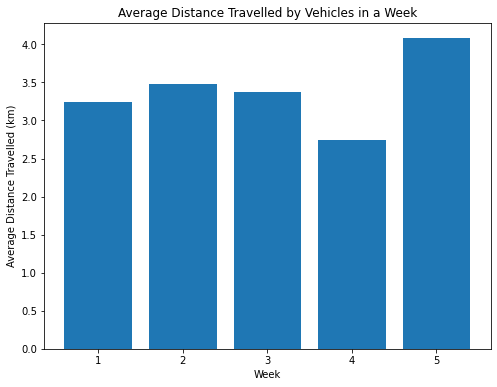

In [99]:
draw_bar(feature=trips_df['created'].dt.day // 7 + 1, label='Week')

### NOTES
- Vehicles travel the most on the fifth week of the month 

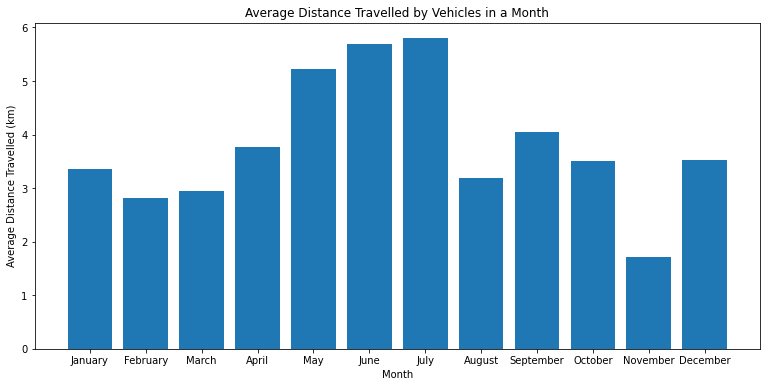

In [100]:

# convert month column to categorical data with a specific order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_df['created_month'] = pd.Categorical(trips_df['created_month'], categories=month_order, ordered=True)
draw_bar(feature='created_month', label='Month', figsize=(13,6))

### NOTES
- Vehicles travel more mid-year in the months of May, June, July.
- Vehicles travel least in November, then suddenly travel more in december .
- The distance is gradually increasing from February then peaks at July.
- After this it drops.

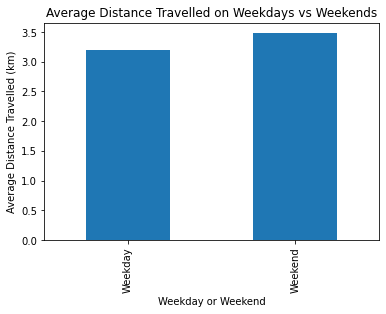

In [101]:
# Create a new column to identify whether a trip was on a weekday or weekend
trips_df['is_weekend'] = trips_df['created_day'].isin(['Saturday', 'Sunday'])

# Group the trips by weekday/weekend and calculate the average distance travelled
avg_distance_by_day = trips_df.groupby('is_weekend')['distance_km'].mean()

# Visualize the results
avg_distance_by_day.plot(kind='bar', title='Average Distance Travelled on Weekdays vs Weekends')
plt.xlabel('Weekday or Weekend')
plt.ylabel('Average Distance Travelled (km)')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

### NOTES
- Vehicles travel more during the weekends than weekdays

## 2. What are the most common destinations for vehicles?

                                   destination_address  num_trips  frequency
953                        Thika, Kiambu County, Kenya        466   0.097002
875                        Ruiru, Kiambu County, Kenya        181   0.037677
527        Kiandutu Slums, Thika, Kiambu County, Kenya        175   0.036428
217                    A3, Thika, Kiambu County, Kenya        158   0.032889
921                        Super Highway, Ruiru, Kenya        123   0.025604
528                  Kianyaga, Kirinyaga County, Kenya        116   0.024147
317       Eastern By Pass, Ruiru, Kiambu County, Kenya        109   0.022689
651             Makongeni, Thika, Kiambu County, Kenya        106   0.022065
540  Kiganjo - British American Tobacco Road, Thika...         88   0.018318
686           Mitero Road, Ndathi, Nyeri County, Kenya         78   0.016236


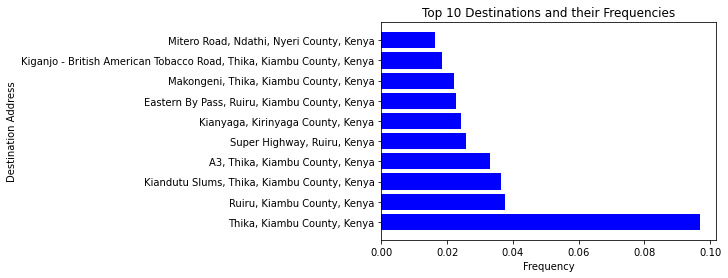

In [102]:
# Group trips by destination address
destination_counts = trips_df.groupby('destination_address').size().reset_index(name='num_trips')

#sort destination by number of trips
sorted_destinations = destination_counts.sort_values(by='num_trips', ascending= False)

#calculate average frequency of trips to each destination
sorted_destinations['frequency'] = sorted_destinations['num_trips'] / trips_df['created'].nunique()

print(sorted_destinations.head(10))

# Create a horizontal bar chart
plt.barh(sorted_destinations['destination_address'].head(10), sorted_destinations['frequency'].head(10), color='blue')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Destination Address')
plt.title('Top 10 Destinations and their Frequencies')

# Show the plot
plt.show()

### Group by day of week

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11088\1809367058.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_destinations.drop('total', axis=1, inplace=True)


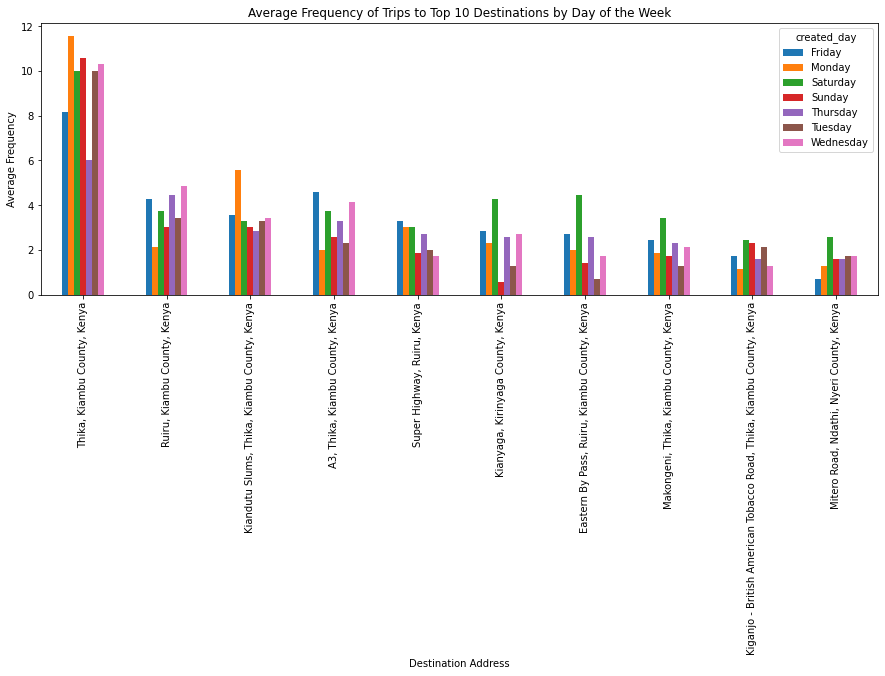

In [105]:
# group trips by destination and day of the week
destination_day_counts = trips_df.groupby(['destination_address', 'created_day']).size().reset_index(name='num_trips')

# calculate average frequency of trips to each destination on each day of the week
destination_day_counts['frequency'] = destination_day_counts['num_trips'] / trips_df['created_day'].nunique()

# pivot the table to have days of the week as columns
destination_day_pivot = destination_day_counts.pivot(index='destination_address', columns='created_day', values='frequency')

# sort destinations by total frequency of trips
destination_day_pivot['total'] = destination_day_pivot.sum(axis=1)
sorted_destinations = destination_day_pivot.sort_values(by='total', ascending=False)

# plot the top 10 destinations by frequency on each day of the week
top_destinations = sorted_destinations.head(10)
# create a new dataframe with the modified columns
top_destinations.drop('total', axis=1, inplace=True)
top_destinations.plot(kind='bar', figsize=(15, 5))
plt.title('Average Frequency of Trips to Top 10 Destinations by Day of the Week')
plt.xlabel('Destination Address')
plt.ylabel('Average Frequency')
plt.show()